M:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
M:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means Silhouette Score: 0.4583
EM (GMM) Silhouette Score: 0.3159


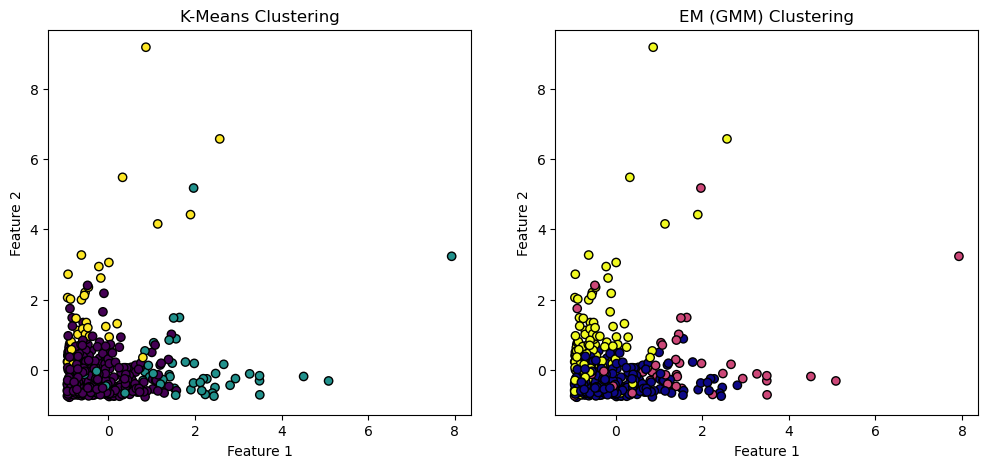

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load Wholesale Customers Dataset
file_path = 'Wholesale customers data.csv'  # Ensure the file is in the working directory
df = pd.read_csv(file_path)

# Select relevant numerical features for clustering
X = df.iloc[:, 2:].values  # Excluding 'Channel' and 'Region'

# Standardize the dataset for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set number of clusters
k = 3  # Change based on your dataset

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# Apply EM Algorithm using Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

# Compare results
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"EM (GMM) Silhouette Score: {gmm_silhouette:.4f}")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='plasma', marker='o', edgecolors='k')
plt.title("EM (GMM) Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


In [3]:
# Implementation of K-Means and EM (GMM) without using any libraries

# Function to read CSV file manually
def read_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(line.strip().split(','))
    return data

# Function to convert data to float (excluding headers)
def preprocess_data(data):
    return [[float(value) for value in row[2:]] for row in data[1:]]  # Excluding 'Channel' and 'Region'

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

# K-Means clustering implementation
def kmeans(X, k, max_iters=100):
    centroids = X[:k]  # Initialize first k points as centroids
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        new_centroids = [[sum(dim) / len(cluster) for dim in zip(*cluster)] if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        if new_centroids == centroids:
            break  # Stop if centroids don't change
        centroids = new_centroids
    return clusters

# EM Algorithm (GMM) implementation
def gaussian_pdf(x, mean, variance):
    exponent = sum((xi - mi) ** 2 / (2 * vi) for xi, mi, vi in zip(x, mean, variance))
    return (1 / ((2 * 3.1416) ** (len(x) / 2) * sum(variance) ** 0.5)) * (2.71828 ** -exponent)

def em_gmm(X, k, max_iters=100):
    means = X[:k]
    variances = [[1.0] * len(X[0]) for _ in range(k)]
    weights = [1.0 / k] * k
    for _ in range(max_iters):
        responsibilities = []
        for point in X:
            probs = [weights[i] * gaussian_pdf(point, means[i], variances[i]) for i in range(k)]
            total_prob = sum(probs)
            responsibilities.append([p / total_prob for p in probs])
        for i in range(k):
            weighted_sum = [sum(responsibilities[j][i] * X[j][d] for j in range(len(X))) for d in range(len(X[0]))]
            total_weight = sum(responsibilities[j][i] for j in range(len(X)))
            means[i] = [ws / total_weight for ws in weighted_sum]
    return means

# Load and preprocess data
file_path = 'Wholesale customers data.csv'
data = read_csv(file_path)
X = preprocess_data(data)
k = 3  # Number of clusters

# Run K-Means and EM algorithms
kmeans_clusters = kmeans(X, k)
gmm_means = em_gmm(X, k)

# Output results
print("K-Means Clustering Results:", kmeans_clusters)
print("EM (GMM) Cluster Means:", gmm_means)


ZeroDivisionError: float division by zero

In [4]:
# Implementation of K-Means and EM (GMM) without using any libraries

# Function to read CSV file manually
def read_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(line.strip().split(','))
    return data

# Function to convert data to float (excluding headers)
def preprocess_data(data):
    return [[float(value) for value in row[2:]] for row in data[1:]]  # Excluding 'Channel' and 'Region'

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

# K-Means clustering implementation
def kmeans(X, k, max_iters=100):
    centroids = X[:k]  # Initialize first k points as centroids
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        new_centroids = [[sum(dim) / len(cluster) for dim in zip(*cluster)] if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        if new_centroids == centroids:
            break  # Stop if centroids don't change
        centroids = new_centroids
    return clusters

# EM Algorithm (GMM) implementation
def gaussian_pdf(x, mean, variance):
    exponent = sum((xi - mi) ** 2 / (2 * vi) for xi, mi, vi in zip(x, mean, variance))
    return (1 / ((2 * 3.1416) ** (len(x) / 2) * sum(variance) ** 0.5)) * (2.71828 ** -exponent)

def em_gmm(X, k, max_iters=100):
    means = X[:k]
    variances = [[1.0] * len(X[0]) for _ in range(k)]
    weights = [1.0 / k] * k
    for _ in range(max_iters):
        responsibilities = []
        for point in X:
            probs = [weights[i] * gaussian_pdf(point, means[i], variances[i]) for i in range(k)]
            total_prob = sum(probs)
            if total_prob == 0:  # Prevent division by zero
                responsibilities.append([1.0 / k] * k)
            else:
                responsibilities.append([p / total_prob for p in probs])
        for i in range(k):
            weighted_sum = [sum(responsibilities[j][i] * X[j][d] for j in range(len(X))) for d in range(len(X[0]))]
            total_weight = sum(responsibilities[j][i] for j in range(len(X)))
            if total_weight == 0:  # Prevent division by zero
                continue
            means[i] = [ws / total_weight for ws in weighted_sum]
    return means

# Load and preprocess data
file_path = 'Wholesale customers data.csv'
data = read_csv(file_path)
X = preprocess_data(data)
k = 3  # Number of clusters

# Run K-Means and EM algorithms
kmeans_clusters = kmeans(X, k)
gmm_means = em_gmm(X, k)

# Output results
print("K-Means Clustering Results:", kmeans_clusters)
print("EM (GMM) Cluster Means:", gmm_means)


K-Means Clustering Results: [[[22615.0, 5410.0, 7198.0, 3915.0, 1777.0, 5185.0], [31714.0, 12319.0, 11757.0, 287.0, 3881.0, 2931.0], [24653.0, 9465.0, 12091.0, 294.0, 5058.0, 2168.0], [31276.0, 1917.0, 4469.0, 9408.0, 2381.0, 4334.0], [22647.0, 9776.0, 13792.0, 2915.0, 4482.0, 5778.0], [43088.0, 2100.0, 2609.0, 1200.0, 1107.0, 823.0], [29729.0, 4786.0, 7326.0, 6130.0, 361.0, 1083.0], [29955.0, 4362.0, 5428.0, 1729.0, 862.0, 4626.0], [56159.0, 555.0, 902.0, 10002.0, 212.0, 2916.0], [24025.0, 4332.0, 4757.0, 9510.0, 1145.0, 5864.0], [40721.0, 3916.0, 5876.0, 532.0, 2587.0, 1278.0], [27329.0, 1449.0, 1947.0, 2436.0, 204.0, 1333.0], [43265.0, 5025.0, 8117.0, 6312.0, 1579.0, 14351.0], [24904.0, 3836.0, 5330.0, 3443.0, 454.0, 3178.0], [56082.0, 3504.0, 8906.0, 18028.0, 1480.0, 2498.0], [36050.0, 1642.0, 2961.0, 4787.0, 500.0, 1621.0], [76237.0, 3473.0, 7102.0, 16538.0, 778.0, 918.0], [42312.0, 926.0, 1510.0, 1718.0, 410.0, 1819.0], [30379.0, 13252.0, 5189.0, 321.0, 51.0, 1450.0], [37036.0, 7

In [5]:
# Implementation of K-Means and EM (GMM) without using any libraries

# Function to read CSV file manually
def read_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(line.strip().split(','))
    return data

# Function to convert data to float (excluding headers)
def preprocess_data(data):
    return [[float(value) for value in row[2:]] for row in data[1:]]  # Excluding 'Channel' and 'Region'

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

# K-Means clustering implementation
def kmeans(X, k, max_iters=100):
    centroids = X[:k]  # Initialize first k points as centroids
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        new_centroids = [[sum(dim) / len(cluster) for dim in zip(*cluster)] if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        if new_centroids == centroids:
            break  # Stop if centroids don't change
        centroids = new_centroids
    return clusters

# EM Algorithm (GMM) implementation
def gaussian_pdf(x, mean, variance):
    exponent = sum((xi - mi) ** 2 / (2 * vi) for xi, mi, vi in zip(x, mean, variance))
    return (1 / ((2 * 3.1416) ** (len(x) / 2) * sum(variance) ** 0.5)) * (2.71828 ** -exponent)

def em_gmm(X, k, max_iters=100):
    means = X[:k]
    variances = [[1.0] * len(X[0]) for _ in range(k)]
    weights = [1.0 / k] * k
    for _ in range(max_iters):
        responsibilities = []
        for point in X:
            probs = [weights[i] * gaussian_pdf(point, means[i], variances[i]) for i in range(k)]
            total_prob = sum(probs)
            if total_prob == 0:  # Prevent division by zero
                responsibilities.append([1.0 / k] * k)
            else:
                responsibilities.append([p / total_prob for p in probs])
        for i in range(k):
            weighted_sum = [sum(responsibilities[j][i] * X[j][d] for j in range(len(X))) for d in range(len(X[0]))]
            total_weight = sum(responsibilities[j][i] for j in range(len(X)))
            if total_weight == 0:  # Prevent division by zero
                continue
            means[i] = [ws / total_weight for ws in weighted_sum]
    return means

# ASCII Plotting Function
def plot_ascii(clusters):
    min_x, max_x = min(p[0] for cluster in clusters for p in cluster), max(p[0] for cluster in clusters for p in cluster)
    min_y, max_y = min(p[1] for cluster in clusters for p in cluster), max(p[1] for cluster in clusters for p in cluster)
    width, height = 40, 20  # Grid size
    grid = [[' ' for _ in range(width)] for _ in range(height)]
    symbols = ['*', '#', '@']
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            x_scaled = int((point[0] - min_x) / (max_x - min_x) * (width - 1))
            y_scaled = int((point[1] - min_y) / (max_y - min_y) * (height - 1))
            grid[y_scaled][x_scaled] = symbols[cluster_idx % len(symbols)]
    for row in grid[::-1]:
        print(''.join(row))

# Load and preprocess data
file_path = 'Wholesale customers data.csv'
data = read_csv(file_path)
X = preprocess_data(data)
k = 3  # Number of clusters

# Run K-Means and EM algorithms
kmeans_clusters = kmeans(X, k)
gmm_means = em_gmm(X, k)

# Output results
print("K-Means Clustering Results:", kmeans_clusters)
print("EM (GMM) Cluster Means:", gmm_means)

# Plot K-Means clusters in ASCII
print("\nK-Means Clustering ASCII Plot:")
plot_ascii(kmeans_clusters)

K-Means Clustering Results: [[[22615.0, 5410.0, 7198.0, 3915.0, 1777.0, 5185.0], [31714.0, 12319.0, 11757.0, 287.0, 3881.0, 2931.0], [24653.0, 9465.0, 12091.0, 294.0, 5058.0, 2168.0], [31276.0, 1917.0, 4469.0, 9408.0, 2381.0, 4334.0], [22647.0, 9776.0, 13792.0, 2915.0, 4482.0, 5778.0], [43088.0, 2100.0, 2609.0, 1200.0, 1107.0, 823.0], [29729.0, 4786.0, 7326.0, 6130.0, 361.0, 1083.0], [29955.0, 4362.0, 5428.0, 1729.0, 862.0, 4626.0], [56159.0, 555.0, 902.0, 10002.0, 212.0, 2916.0], [24025.0, 4332.0, 4757.0, 9510.0, 1145.0, 5864.0], [40721.0, 3916.0, 5876.0, 532.0, 2587.0, 1278.0], [27329.0, 1449.0, 1947.0, 2436.0, 204.0, 1333.0], [43265.0, 5025.0, 8117.0, 6312.0, 1579.0, 14351.0], [24904.0, 3836.0, 5330.0, 3443.0, 454.0, 3178.0], [56082.0, 3504.0, 8906.0, 18028.0, 1480.0, 2498.0], [36050.0, 1642.0, 2961.0, 4787.0, 500.0, 1621.0], [76237.0, 3473.0, 7102.0, 16538.0, 778.0, 918.0], [42312.0, 926.0, 1510.0, 1718.0, 410.0, 1819.0], [30379.0, 13252.0, 5189.0, 321.0, 51.0, 1450.0], [37036.0, 7

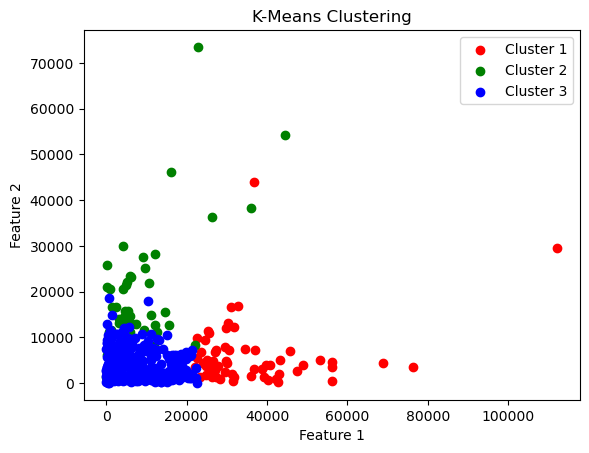

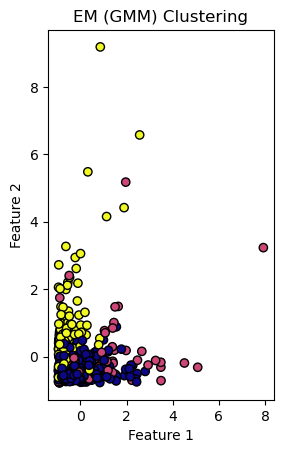

In [4]:
import matplotlib.pyplot as plt

# Implementation of K-Means and EM (GMM) without using extra libraries

# Function to read CSV file manually
def read_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(line.strip().split(','))
    return data

# Function to convert data to float (excluding headers)
def preprocess_data(data):
    return [[float(value) for value in row[2:]] for row in data[1:]]  # Excluding 'Channel' and 'Region'

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

# K-Means clustering implementation
def kmeans(X, k, max_iters=100):
    centroids = X[:k]  # Initialize first k points as centroids
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        new_centroids = [[sum(dim) / len(cluster) for dim in zip(*cluster)] if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        if new_centroids == centroids:
            break  # Stop if centroids don't change
        centroids = new_centroids
    return clusters

# EM Algorithm (GMM) implementation
def gaussian_pdf(x, mean, variance):
    exponent = sum((xi - mi) ** 2 / (2 * vi) for xi, mi, vi in zip(x, mean, variance))
    return (1 / ((2 * 3.1416) ** (len(x) / 2) * sum(variance) ** 0.5)) * (2.71828 ** -exponent)

def em_gmm(X, k, max_iters=100):
    means = X[:k]
    variances = [[1.0] * len(X[0]) for _ in range(k)]
    weights = [1.0 / k] * k
    for _ in range(max_iters):
        responsibilities = []
        for point in X:
            probs = [weights[i] * gaussian_pdf(point, means[i], variances[i]) for i in range(k)]
            total_prob = sum(probs)
            if total_prob == 0:  # Prevent division by zero
                responsibilities.append([1.0 / k] * k)
            else:
                responsibilities.append([p / total_prob for p in probs])
        for i in range(k):
            weighted_sum = [sum(responsibilities[j][i] * X[j][d] for j in range(len(X))) for d in range(len(X[0]))]
            total_weight = sum(responsibilities[j][i] for j in range(len(X)))
            if total_weight == 0:  # Prevent division by zero
                continue
            means[i] = [ws / total_weight for ws in weighted_sum]
    return means

# Plotting function using Matplotlib
def plot_clusters(clusters, title):
    colors = ['r', 'g', 'b']
    for i, cluster in enumerate(clusters):
        x_vals = [point[0] for point in cluster]
        y_vals = [point[1] for point in cluster]
        plt.scatter(x_vals, y_vals, c=colors[i % len(colors)], label=f'Cluster {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Load and preprocess data
file_path = 'Wholesale customers data.csv'
data = read_csv(file_path)
X = preprocess_data(data)
k = 3  # Number of clusters

# Run K-Means and EM algorithms
kmeans_clusters = kmeans(X, k)
gmm_means = em_gmm(X, k)

# Output results
#print("K-Means Clustering Results:", kmeans_clusters)
#print("EM (GMM) Cluster Means:", gmm_means)

# Plot K-Means clusters
plot_clusters(kmeans_clusters, "K-Means Clustering")

# Plot EM (GMM) cluster means
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='plasma', marker='o', edgecolors='k')
plt.title("EM (GMM) Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()